### Description

Context
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

 

### Objective
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

In [1]:
# import libraries
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
# Load the XLSX file
df = pd.read_excel('Credit_Card_Customer_Data.xlsx')



In [3]:
# Convert to CSV and save
df.to_csv('Credit_Card_Customer_Data.csv', index=False)

In [4]:
import pandas as pd

# Read the CSV file using a relative file path
customer_data = pd.read_csv('Credit_Card_Customer_Data.csv')


In [5]:
customer_data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [6]:
customer_data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [7]:
# replace customer key with custmer_key
customer_data.rename(columns={'Customer Key': 'Customer_Key'}, inplace=True)

In [8]:
#perform sanity check

customer_data.columns

Index(['Sl_No', 'Customer_Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [9]:
customer_data.isnull().sum()

Sl_No                  0
Customer_Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

No NaN value observerd

In [10]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


All data types are integers

In [11]:
customer_data.shape

(660, 7)

This showed 660 rows and 7 columns

In [12]:
customer_data.duplicated().sum()

0

No duplication found in the dataframe

In [13]:
customer_data.describe()

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


#### Observations
- Minimum Total visit to the bank, Total visit to Onlin and Total calls made  showed 0.0
- The average values for Total credit cards owned by customer is 4.706061
- The average Total visits to the bank is 2.403030
- Average credit limit is 34574.242424
- Average visits online is 660.000000
- Average total calls made is Total_calls_made

In [14]:
# Lets check how many Customer_Key have Total visits to the bank, online and total calls as zero

customer_data[customer_data['Customer_Key'] == 0]

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


This actually showed none. However, I have to explore these columns more to have a better insight of what is happening

In [15]:
customer_data['Total_visits_bank']

0      1
1      0
2      1
3      1
4      0
      ..
655    1
656    1
657    1
658    1
659    0
Name: Total_visits_bank, Length: 660, dtype: int64

Observation here showen that the zero actually means that there was no visit for this customer key to the bank

In [16]:
customer_data['Total_visits_online']

0       1
1      10
2       3
3       1
4      12
       ..
655    10
656    13
657     9
658    15
659    12
Name: Total_visits_online, Length: 660, dtype: int64

- Observation here showen that the zero actually means that there was no visit for this customer key to the bank.
- The samething is applicable to Total_calls_made


### Univariate Data Visiualization for Numerical variables

In [17]:
# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(9, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

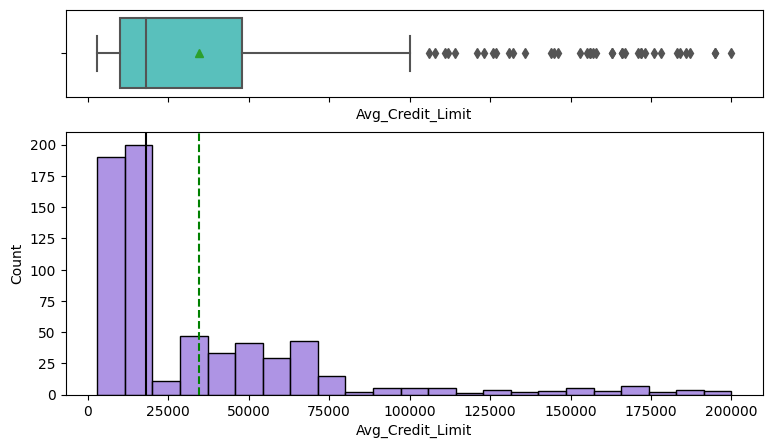

In [18]:
histogram_boxplot(data=customer_data, feature = 'Avg_Credit_Limit')

The distribution right skewed with lots of outliers

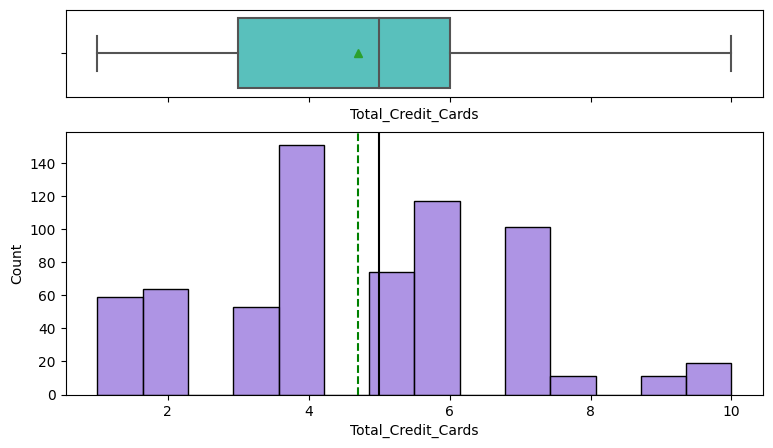

In [19]:
histogram_boxplot(data=customer_data, feature = 'Total_Credit_Cards')

The Total credit card is slightly skewed to the right. However, no outlier was detected. 

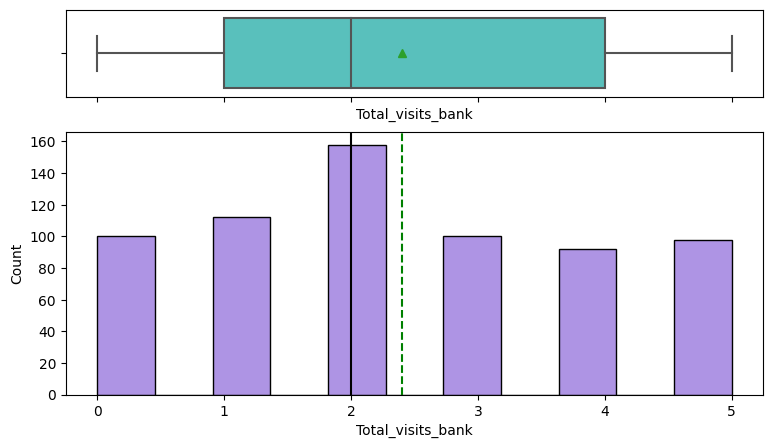

In [20]:
histogram_boxplot(data=customer_data, feature = 'Total_visits_bank')

There is not outlier detected

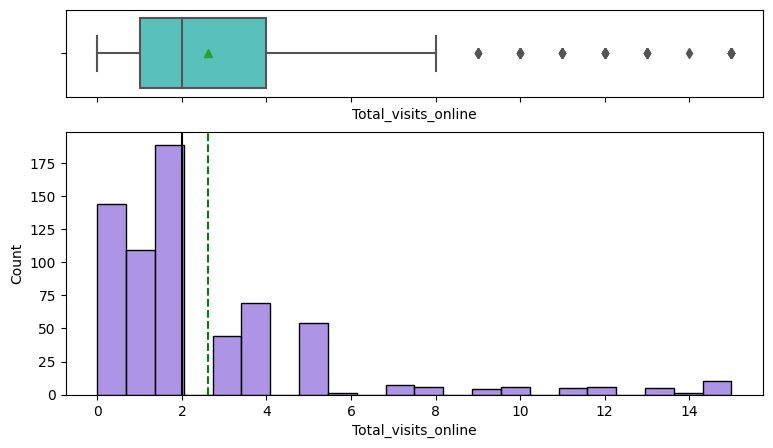

In [21]:
histogram_boxplot(data=customer_data, feature = 'Total_visits_online')

The total visits online is right skewed with lots of outliers

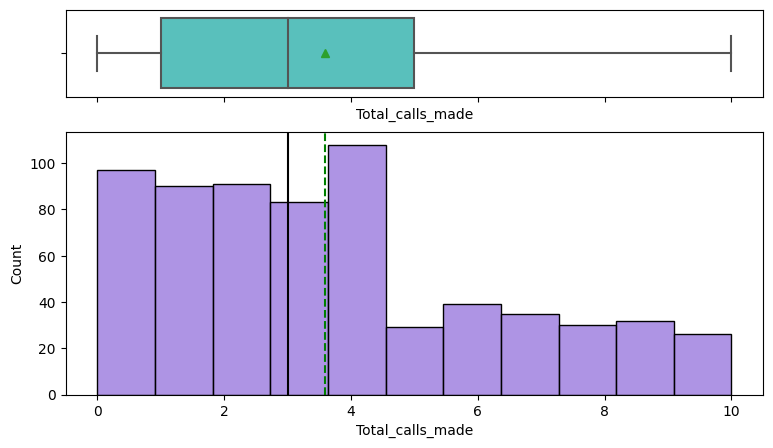

In [22]:
histogram_boxplot(data=customer_data, feature = 'Total_calls_made')

The distribution skewed to the right. However, there is no outlier

### Data Preprocessing

- Since K-means uses distance, I will be treating the outliers detectected. 

#### Outlier detection and treatment

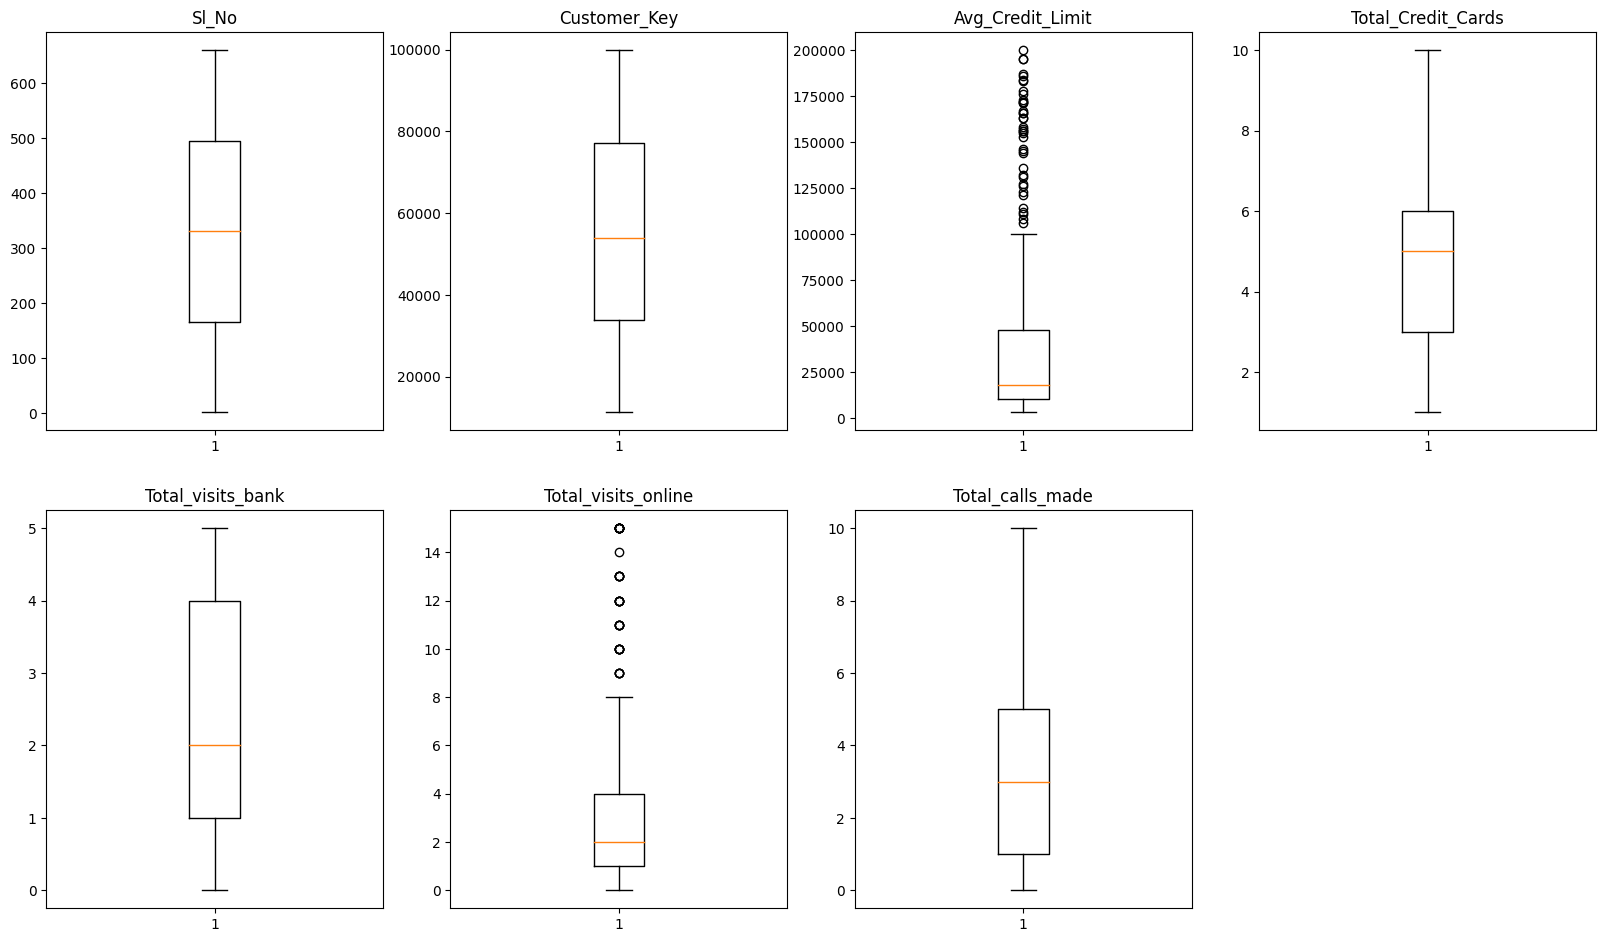

In [23]:
#Using boxplot for the detection
num_data = customer_data.select_dtypes(include = 'number')
plt.figure(figsize = (20,30))

for i, variable in enumerate(num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(customer_data[variable])
    plt.title(variable)

I have outliers in Average card limit and Total visi online

In [24]:
#select numerical values
num_col = customer_data.select_dtypes(include = np.number).columns.tolist()

In [25]:
num_data = customer_data[num_col]

In [26]:
# sanity check on numericData
num_data.columns

Index(['Sl_No', 'Customer_Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [27]:
# Drop the variables that are not needed to build this model
num_data.drop('Sl_No', axis=1, inplace=True)
num_data.drop('Customer_Key', axis=1, inplace=True)

In [28]:
# sanity check on numericData
num_data.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [29]:
#create a function to treate outliers
def treat_outliers(customer_data, col):
    '''
    treat outliers found in variables
    col: str, name of the numerical variable
    videoGame_data: dataframe
    '''
    Q1 = customer_data[col].quantile(0.25) # 25th quantile
    Q3 = customer_data[col].quantile(0.75) # upper quantile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    customer_data[col] = np.clip(customer_data[col], lower_whisker, upper_whisker)
    return customer_data

# define a function to treat all the variables

def treat_outliers_all(customer_data,col_list):
    for c in col_list:
        customer_data = treat_outliers(customer_data,c)
    return customer_data

In [30]:
customer_data = treat_outliers_all(customer_data,num_data)

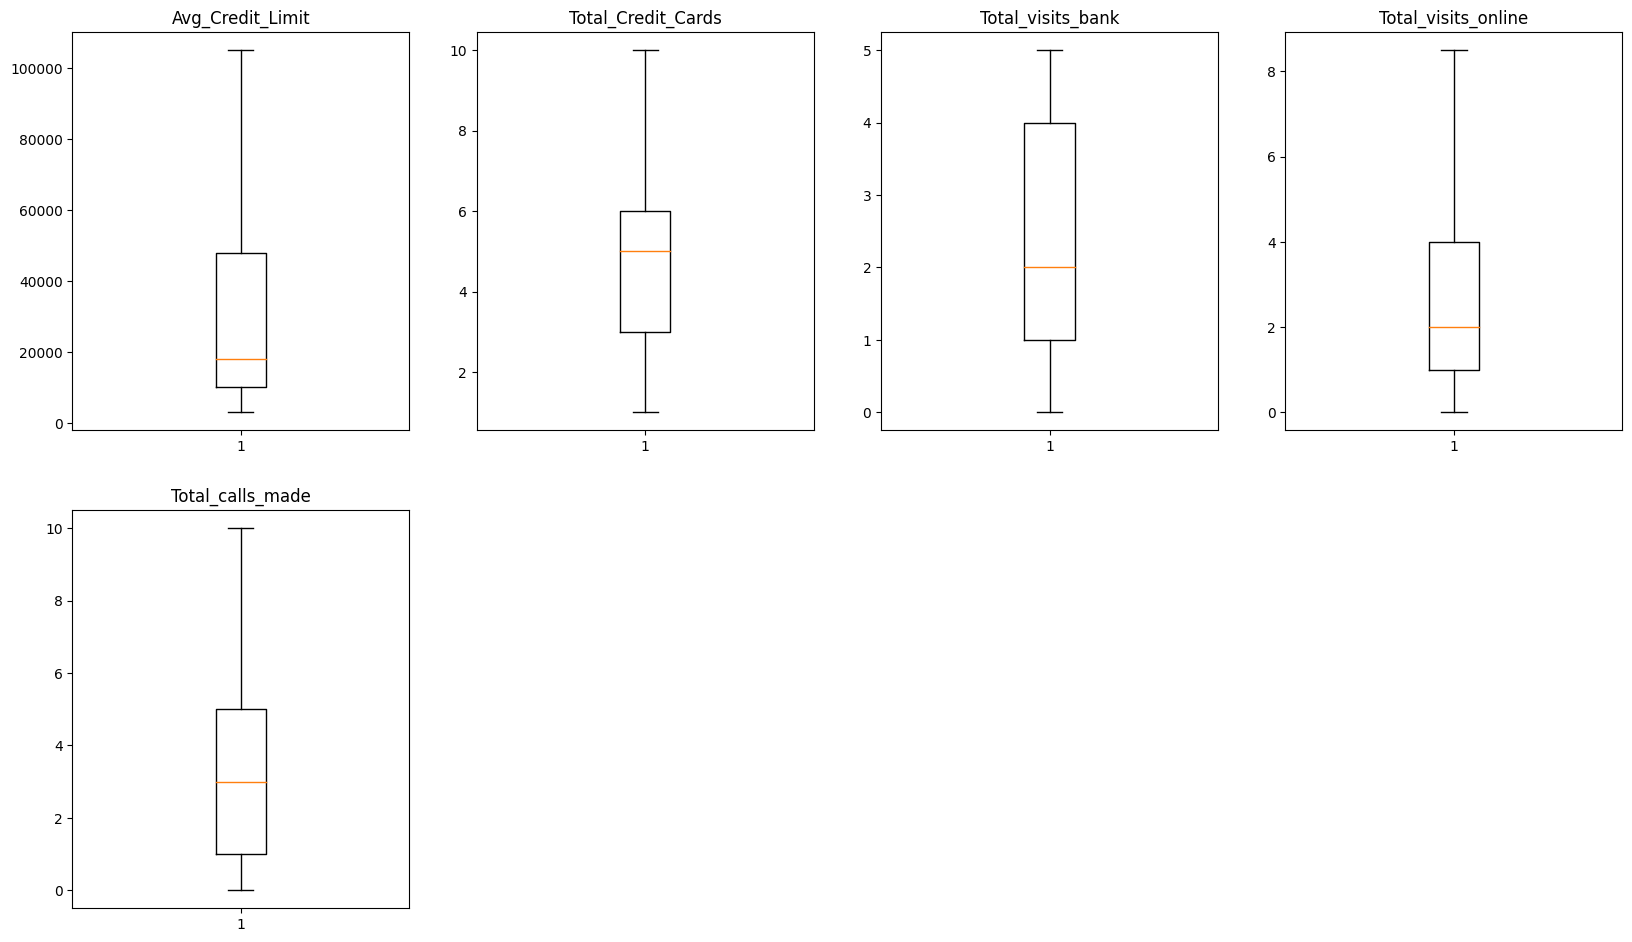

In [31]:
#sanity checks on the treated outliers using boxplot
plt.figure(figsize = (20,30))

for i, variable in enumerate(num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(customer_data[variable], whis = 1.5)
    plt.title(variable)
plt.show()

### Bivariate Analysis

#### Ploting correllation map

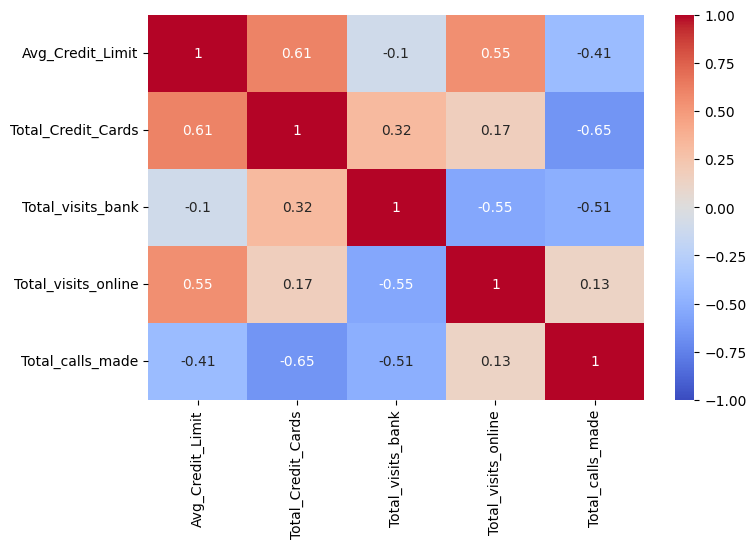

In [32]:
# calculate correlation
mat_cor = num_data.corr()
plt.figure(figsize = (8,5))
sns.heatmap(mat_cor, annot=True, vmin=-1, vmax=1, cmap='coolwarm');

- Average credit Limit is positively correlated with Total credit card and and Total visiti online
- There are some of correlations and contributions Total visits to the bank and Totatl credit cards
- Some correlations though low was also observed between Total credit cards and and Total visits to the bank

### Building Model

#### K-Means Cluster

In [33]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



#### Feature selection
- This was earlier selected during data preprocessing

In [34]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(num_data)

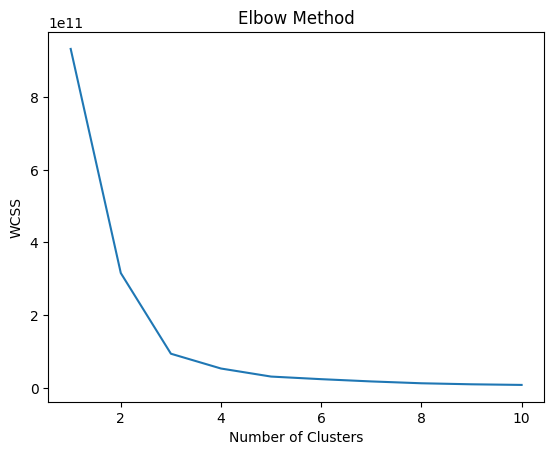

In [35]:
#check number of clusters ideal to build the modle

from sklearn.cluster import KMeans

# Using Kmeans'Inetria to calculate 
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(num_data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


- Between 2 and 3 clusters looks ideal for building the model. However, I will choose 3

#### Applying Kmeans clustering for K=3

In [40]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_scaled)
kmeans_labels = kmeans.labels_

In [37]:
kmeans.labels_

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
# Add k-means cluster labels to the original dataframe
num_data['k_means_segments'] = kmeans_labels

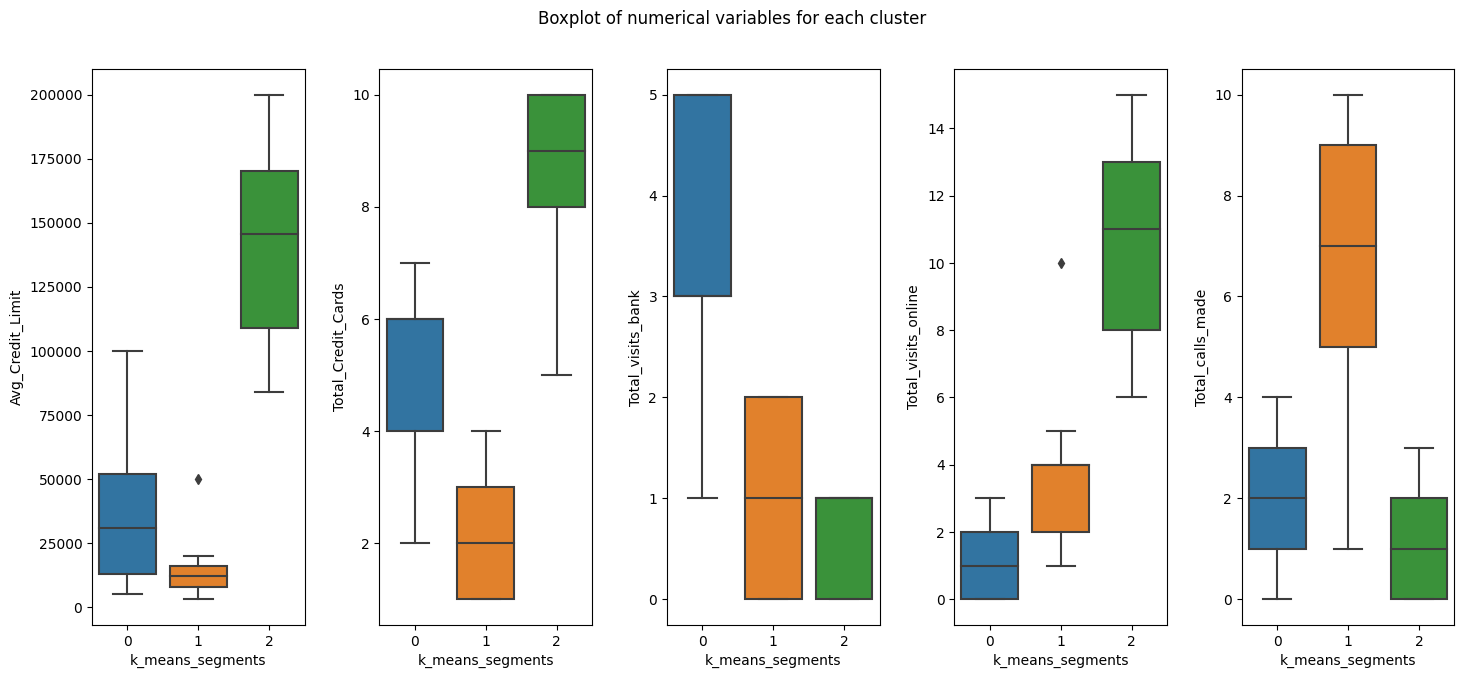

In [43]:
# Visualize the K-means clusters
fig, axes = plt.subplots(1, 5, figsize=(15, 7))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=num_data[num_data.columns[counter]], x=num_data['k_means_segments'])
    counter = counter + 1
fig.tight_layout(pad=2.0)

- Cluster 0:
    - The average credit is low but better than those of cluster 1
    - The total credit cards are moderately high.
    - The total visits to the bank is high
    - Total visits online is low
    - Total calls made is moderately low
    
- Cluster 1:
    - The Average credit limit is low
    - The total credit cards are moderately low.
    - The visit to the bank are low to moderate
    - Total visits online are also moderately low
    - Total calls made are moderately high
    
- Cluster 2:
    - Average credit limit is moderately high
    - Total credit cards are high
    - Total visit to bank is low
    - Total visits online are moderately high
    - Total calls made are moderately low

#### Calcualte the internal measure of the Kmeans. 
- This will help us to make comparison with other algorith we will use to do the same clustering

In [177]:
# Calculate internal evaluation measures
davies_bouldin_index = metrics.davies_bouldin_score(x_scaled, kmeans_labels)
silhouette_coefficient = metrics.silhouette_score(x_scaled, kmeans_labels)
calinski_harabasz_score = metrics.calinski_harabasz_score(x_scaled, kmeans_labels)

# Print the results
print("Internal Evaluation Measures")
print("***************************")
print("Davies-Bouldin Index:", davies_bouldin_index)
print("Silhouette Coefficient:", silhouette_coefficient)
print("Calinski Harabasz Score:", calinski_harabasz_score)

Internal Evaluation Measures
***************************
Davies-Bouldin Index: 0.7736795455791725
Silhouette Coefficient: 0.4961287276650308
Calinski Harabasz Score: 488.601229653306


#### DBSCAN Clustering

In [106]:
# Import DBSCAN libry
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [127]:
#using original data

num_data2 = customer_data[num_col]

In [128]:
num_data2 .columns

Index(['Sl_No', 'Customer_Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [129]:
# Drop the variables that are not needed to build this model
num_data2.drop('Sl_No', axis=1, inplace=True)
num_data2.drop('Customer_Key', axis=1, inplace=True)

In [130]:
#samity check
num_data2 .columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [169]:
#Normalize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(num_data2)

In [170]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [2, 3, 4, 5, 6]

best_eps = None
best_min_samples = None
best_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(num_data2)
        
        num_labels = len(np.unique(labels))
        if num_labels > 1:
            score = silhouette_score(num_data2, labels)
            print(f'eps: {eps}, min_samples: {min_samples}, silhouette score: {score}')
            
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f'Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {best_score}')


eps: 0.1, min_samples: 2, silhouette score: -0.7394054695902162
eps: 0.1, min_samples: 3, silhouette score: 0.4964333924828322
eps: 0.2, min_samples: 2, silhouette score: -0.7394054695902162
eps: 0.2, min_samples: 3, silhouette score: 0.4964333924828322
eps: 0.3, min_samples: 2, silhouette score: -0.7394054695902162
eps: 0.3, min_samples: 3, silhouette score: 0.4964333924828322
eps: 0.4, min_samples: 2, silhouette score: -0.7394054695902162
eps: 0.4, min_samples: 3, silhouette score: 0.4964333924828322
eps: 0.5, min_samples: 2, silhouette score: -0.7315682173212412
eps: 0.5, min_samples: 3, silhouette score: 0.5072530296020772
Best eps: 0.5, Best min_samples: 3, Best silhouette score: 0.5072530296020772


In [171]:
#build model
dbscan = DBSCAN(eps = 0.5, min_samples = 3)
db_labels = dbscan.fit_predict(num_data2)

In [172]:
#check unique labels
np.unique(db_labels)

array([-1,  0,  1], dtype=int64)

In [173]:
#add the dbscan labels to the original data
num_data2['db_labels'] =  db_labels

#### Visualizing groups

In [174]:
num_data2.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'db_labels'],
      dtype='object')

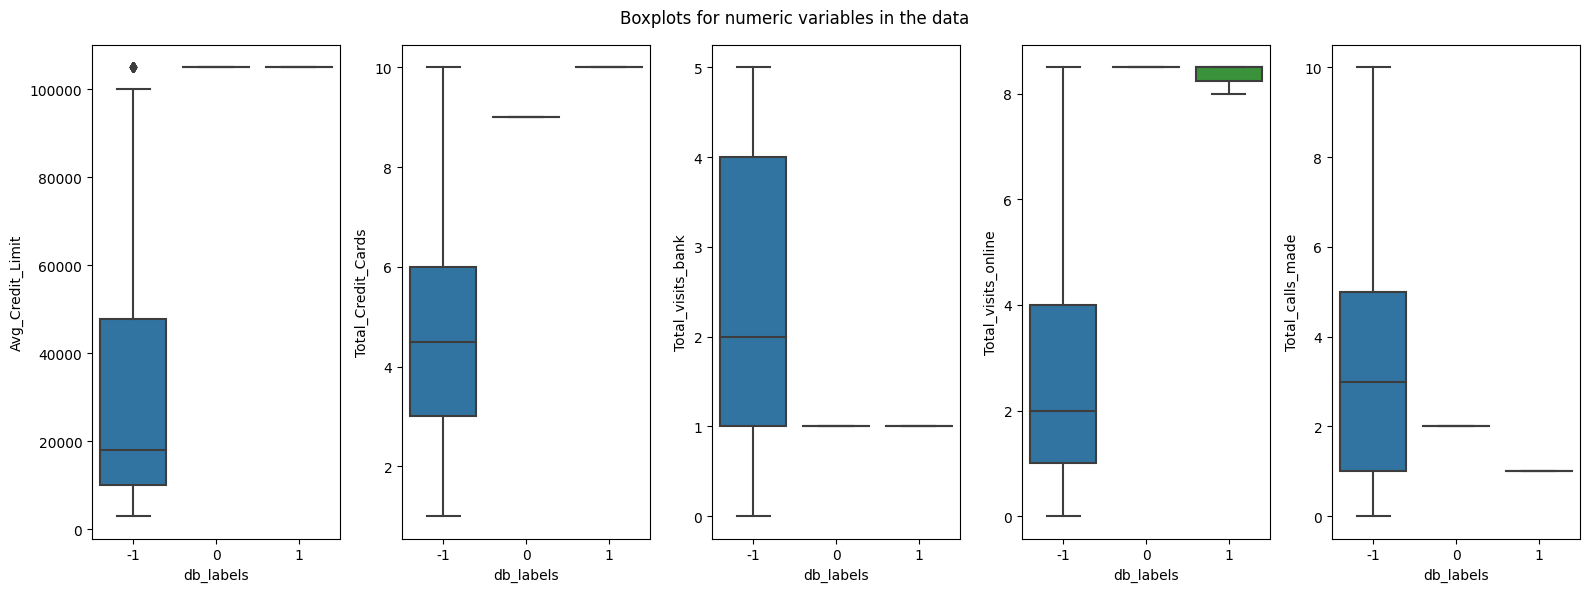

In [175]:
# Create subplots for boxplots
fig, ax = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle('Boxplots for numeric variables in the data')

count = 0
num_cols = num_data2.columns  # Assuming `num_cols` contains the column names of the numeric variables

# Iterate over the subplots
for i in range(5):
    # Use the column names to access data correctly
    sns.boxplot(ax=ax[i], x=num_data2['db_labels'], y=num_data2[num_cols[count]])
    count += 1

fig.tight_layout()
plt.show()






The DB clustering did not give me a better clustering

In [162]:
# Calculate internal evaluation measures
davies_bouldin_index = metrics.davies_bouldin_score(num_data2, db_labels)
silhouette_coefficient = metrics.silhouette_score(num_data2, db_labels)
calinski_harabasz_score = metrics.calinski_harabasz_score(num_data2, db_labels)

print("Internal Evaluation Measures")
print("***************************")
print("Davies-Bouldin Index:", davies_bouldin_index)
print("Silhouette Coefficient:", silhouette_coefficient)
print("Calinski Harabasz Score:", calinski_harabasz_score)

Internal Evaluation Measures
***************************
Davies-Bouldin Index: 0.31265973151117055
Silhouette Coefficient: 0.4964333924828322
Calinski Harabasz Score: 20.535510321394167


# K-means vs DBSCAN Clustering

The following are th internal measures for the two algorithms used.
- K-means:
    - Davies-Bouldin Index: 0.7736795455791725
    - Silhouette Coefficient: 0.4961287276650308
    - Calinski Harabasz Score: 488.601229653306
        
- DBSCAN:
    - Davies-Bouldin Index: 0.31265973151117055
    - Silhouette Coefficient: 0.4964333924828322
    - Calinski Harabasz Score: 20.535510321394167
    
    
Examining the outcomes:


The better the clustering, the lower the Davies-Bouldin Index score. In this instance, DBSCAN (0.3127) delivers better-defined clusters than K-means (0.7737) since it has a lower Davies-Bouldin Index.
Silhouette Coefficient: The better the grouping, the closer the value is to 1. Similar Silhouette Coefficients are found for both algorithms, with K-means (0.4961) and DBSCAN (0.4964) producing equivalent results.

The greater the value, the better the grouping according to the Calinski Harabasz score. The fact that K-means (488.6012) has a substantially higher Calinski Harabasz Score than DBSCAN (20.5355) suggests that K-means creates clusters that are more clearly defined and well-separated.
K-means performs better than DBSCAN in terms of the Davies-Bouldin Index and Calinski Harabasz Score based on the evaluation measures, demonstrating that K-means offers superior clustering outcomes in this case. 


# Actionable Insights & Recommendations

Since K-means performed better, I will be given the insights and recommendations based on K-means.

- The data showed that customers in cluster 0 prefer to visit the bank(branch) than accessing the bank's product through online.However, moderate success have been achieved in the area of credit card. Since these set of customers prefer visiting the bank. It is recommended that a product be designed to specifically for them. There have been complain of poor customer service. For this campaign, the bank should train a change agent who will ensure that staff behaviour to customers improves. The change agents can also serve as marketers who will always be available to engage these customers and sell the bank's products directly to them based on their needs whenever they visit the branch. This will help to improve market penetrations.


- The cluster 1 customers are the set of customers that usually call the bank on the phone. They prefer to call the bank to get their needs sorted out that to visit the branch or go online. It is recomended that bank establish and train their helpdesk or contact center staff to equip them with enough skills and knowledge to attend to attend to this set of customers. The trained staff should be able to attend to them professionally, sells bank's products to them via the calls.They should be able to tell the customers the advantages of using bank's products. There should also be automated anwsering machine that will first advertised the bank's products to these set of customers before directing them to the customer service agent that will speak to them. Call charges can also be subsidized for them to enable them always stay long on the call and get all the informations they need. Customer support agents should at all times ensure that their enquiries or issues are resolved. I also recommend that bank's agents call these set of customers from time to time to follow up with them and also showacase the bank's products.


- The cluster 2 customers prefere online visits and use of credit cards. The bank should ensure that their online banking applications are up, scalable and usable at all times. They should advertise other products like credit cards, mortgages, bond,stucks and securities to these set of customers through online.Different card products should be cretaed and presented to them.


- In summary, for the bank to improve the market penetration, they will need to design specific and targetd  adverts to these  different groups based on the above characeristics that they have exhibited.